In [251]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [252]:
master_stocks=pd.read_csv(r"D:\PG-DAI\MachineLearning\Assessment\2 Stocks\Stocks.csv",index_col=0, parse_dates=True)


In [253]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized = normalizer.fit_transform(master_stocks)
normalized = pd.DataFrame(normalized)

In [254]:
index = master_stocks.T.index
normalized.index = master_stocks.index
normalized = normalized.T
normalized.index = master_stocks.T.index
normalized = normalized.T

In [255]:

week_num = [x for x in range(0,963,7)]
custom_df = pd.DataFrame()
list = []
for i in week_num:
    if(i==7):
        Data15 = normalized.T.loc[index[0]:index[7]].mean()
        custom_df[i] = Data15
    else:
        Data15 = normalized.T.loc[index[i-7]:index[i]].mean()
#         list.append(Data15)
        custom_df[i] = Data15

In [256]:
del custom_df[0]

In [257]:
dataset = normalized

In [258]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [259]:
pca=PCA()

In [260]:
pca.fit(dataset)
pca.explained_variance_ratio_

array([8.04404689e-02, 5.19094992e-02, 4.36165478e-02, 3.45087572e-02,
       3.27412627e-02, 3.14581729e-02, 3.03444349e-02, 2.58773055e-02,
       2.50243147e-02, 2.44208855e-02, 2.38435957e-02, 2.21524499e-02,
       2.18475042e-02, 2.12363637e-02, 2.01636425e-02, 1.99710713e-02,
       1.94534505e-02, 1.84696307e-02, 1.80950586e-02, 1.75619213e-02,
       1.69351391e-02, 1.62717571e-02, 1.61155228e-02, 1.57215124e-02,
       1.53369877e-02, 1.51309538e-02, 1.49817207e-02, 1.41739316e-02,
       1.37499692e-02, 1.34650706e-02, 1.30974534e-02, 1.29956985e-02,
       1.21881813e-02, 1.20508896e-02, 1.19313317e-02, 1.16792927e-02,
       1.13531186e-02, 1.11888215e-02, 1.07344111e-02, 1.04579645e-02,
       1.03078845e-02, 9.96366611e-03, 9.70631542e-03, 9.52800441e-03,
       9.14422560e-03, 8.98942165e-03, 8.55160526e-03, 8.38159223e-03,
       8.04082170e-03, 7.88500173e-03, 7.81652350e-03, 7.63905575e-03,
       7.16085098e-03, 6.92838481e-03, 6.62759143e-03, 6.06418144e-03,
      

In [261]:
pca.explained_variance_ratio_.cumsum()

array([0.08044047, 0.13234997, 0.17596652, 0.21047527, 0.24321654,
       0.27467471, 0.30501914, 0.33089645, 0.35592076, 0.38034165,
       0.40418525, 0.42633769, 0.4481852 , 0.46942156, 0.48958521,
       0.50955628, 0.52900973, 0.54747936, 0.56557442, 0.58313634,
       0.60007148, 0.61634323, 0.63245876, 0.64818027, 0.66351726,
       0.67864821, 0.69362993, 0.70780386, 0.72155383, 0.7350189 ,
       0.74811636, 0.76111205, 0.77330024, 0.78535113, 0.79728246,
       0.80896175, 0.82031487, 0.83150369, 0.8422381 , 0.85269607,
       0.86300395, 0.87296762, 0.88267393, 0.89220194, 0.90134616,
       0.91033558, 0.91888719, 0.92726878, 0.9353096 , 0.9431946 ,
       0.95101113, 0.95865018, 0.96581103, 0.97273942, 0.97936701,
       0.98543119, 0.99102412, 0.99629495, 1.        , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

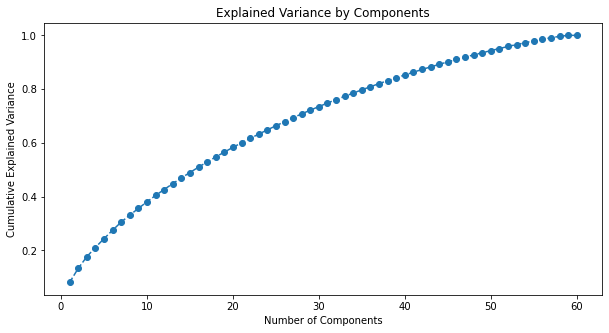

In [262]:
# Plot the cumulative variance explained by total number of components.

# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % - 90% of the explained variance.
plt.figure(figsize=(10,5))

plt.plot (range (1,61), pca.explained_variance_ratio_.cumsum (), marker = 'o', linestyle = '--')

plt.title('Explained Variance by Components')

plt.xlabel('Number of Components')

plt.ylabel('Cumulative Explained Variance')

In [263]:
pca=PCA(n_components= 2)
pca.fit(dataset)
pca.explained_variance_ratio_


array([0.08044047, 0.05190947])

In [264]:
df= pca.transform(dataset)
print(df)
df1=np.transpose(df)
PCA1=df1[0]
PCA2=df1[1]

[[-0.11829404  0.35269177]
 [-0.15920242  0.10787641]
 [-0.03866624  0.31559332]
 [-0.06889956  0.00831471]
 [-0.00444762  0.09128061]
 [-0.27560667 -0.11622779]
 [ 0.15528921 -0.24118151]
 [-0.14046934 -0.11239481]
 [-0.2315737  -0.08183792]
 [ 0.5321846   0.08639734]
 [-0.12271577 -0.25032841]
 [-0.17212372  0.17265397]
 [-0.04493893 -0.2942698 ]
 [-0.1496847  -0.10761246]
 [-0.12245428  0.2065357 ]
 [-0.21692155  0.04973627]
 [-0.09311137 -0.13317238]
 [-0.05761917  0.28605755]
 [-0.24497203 -0.09381822]
 [ 0.102435   -0.2031019 ]
 [ 0.13172895  0.13054099]
 [-0.16708414 -0.09699969]
 [-0.19322288  0.14260284]
 [-0.02042021  0.09581976]
 [-0.12451356  0.19221228]
 [ 0.37624369 -0.06213967]
 [-0.23963784 -0.18077509]
 [ 0.56200376  0.05574762]
 [ 0.4002012  -0.01585225]
 [ 0.0993489   0.15521011]
 [ 0.03530631  0.17197151]
 [ 0.20452447  0.11365696]
 [-0.01463154 -0.06056771]
 [-0.11087199  0.22279297]
 [-0.11094857 -0.07300327]
 [-0.24402884  0.08960061]
 [ 0.01824125  0.14799181]
 

In [265]:
from sklearn.cluster import KMeans

In [266]:
sse = []
kmeans = range(1,10)
for k in kmeans:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
print(sse)

[4.720261520162064, 2.5867974057914855, 1.204683796580378, 0.7879329612267905, 0.5664378265170387, 0.4632363546161818, 0.359030608457055, 0.29046384879818976, 0.24272753387222432]


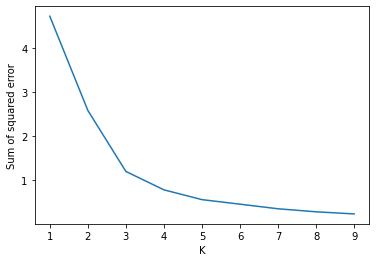

In [267]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmeans,sse)

In [268]:
km = KMeans(n_clusters=10)
y_predicted = km.fit_predict(df)
y_predicted

array([4, 3, 4, 5, 8, 9, 6, 5, 9, 2, 1, 7, 1, 5, 7, 3, 5, 4, 9, 6, 0, 5,
       3, 8, 7, 2, 9, 2, 2, 0, 8, 0, 5, 7, 5, 3, 8, 6, 2, 6, 2, 2, 1, 5,
       9, 9, 6, 7, 5, 1, 7, 7, 6, 5, 0, 9, 2, 1, 3, 4])

In [269]:
km.cluster_centers_

array([[ 0.1639551 ,  0.1381045 ],
       [-0.05928314, -0.29240193],
       [ 0.45958794,  0.01689717],
       [-0.19639699,  0.09311664],
       [-0.0602143 ,  0.32037105],
       [-0.10697129, -0.0753247 ],
       [ 0.13292229, -0.22592403],
       [-0.13756377,  0.20553386],
       [ 0.00716993,  0.12676592],
       [-0.22954575, -0.1156661 ]])

In [270]:
df_plot= pd.DataFrame()
df_plot['pca1']=np.transpose(PCA1)
df_plot['pca2']=np.transpose(PCA2)
df_plot['cluster']=y_predicted
df_plot

,pca1,pca2,cluster
0,-0.118294,0.352692,4
1,-0.159202,0.107876,3
2,-0.038666,0.315593,4
3,-0.068900,0.008315,5
4,-0.004448,0.091281,8
5,-0.275607,-0.116228,9
6,0.155289,-0.241182,6
7,-0.140469,-0.112395,5
8,-0.231574,-0.081838,9
9,0.532185,0.086397,2


In [271]:
df_plot1 = df_plot[df_plot.cluster==0]
df_plot2 = df_plot[df_plot.cluster==1]
df_plot3 = df_plot[df_plot.cluster==2]
df_plot4 = df_plot[df_plot.cluster==3]
df_plot5 = df_plot[df_plot.cluster==4]
df_plot6 = df_plot[df_plot.cluster==5]
df_plot7 = df_plot[df_plot.cluster==6]
df_plot8 = df_plot[df_plot.cluster==7]
df_plot9 = df_plot[df_plot.cluster==8]
df_plot10 = df_plot[df_plot.cluster==9]

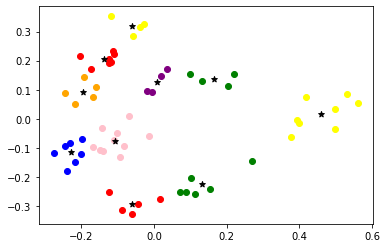

In [274]:
plt.scatter(df_plot1['pca1'],df_plot1['pca2'],color='green',label='cluster 1')
plt.scatter(df_plot2['pca1'],df_plot2['pca2'],color='red',label='cluster 2')
plt.scatter(df_plot3['pca1'],df_plot3['pca2'],color='yellow',label='cluster 3')
plt.scatter(df_plot4['pca1'],df_plot4['pca2'],color='orange',label='cluster 4')
plt.scatter(df_plot5['pca1'],df_plot5['pca2'],color='yellow',label='cluster 5')
plt.scatter(df_plot6['pca1'],df_plot6['pca2'],color='pink',label='cluster 6')
plt.scatter(df_plot7['pca1'],df_plot7['pca2'],color='green',label='cluster 7')
plt.scatter(df_plot8['pca1'],df_plot8['pca2'],color='red',label='cluster 8')
plt.scatter(df_plot9['pca1'],df_plot9['pca2'],color='purple',label='cluster 9')
plt.scatter(df_plot10['pca1'],df_plot10['pca2'],color='blue',label='cluster 10')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
# plt.legend()

In [273]:
pwd

"C:\\Users\\God's Fav"